In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import pickle

In [2]:
df = pd.read_csv('dane/music_data_v2.csv')
df.head()

,Tempo,STE_mean,RMS_std,ZCR_mean,ZCR_std,Bandwidth_std,Contrast0_mean,Contrast1_mean,Contrast4_mean,Contrast5_mean,...,Chroma3_std,Chroma4_std,Chroma5_std,Chroma6_std,Chroma7_std,Chroma8_std,Chroma9_std,Chroma10_std,Chroma11_std,Genre
0,117.453835,0.002751,0.024123,0.084384,0.031907,546.475523,29.507116,16.858170,24.017162,27.175570,...,0.184830,0.251512,0.351089,0.188364,0.323224,0.192700,0.382898,0.313732,0.180709,choir
1,129.199219,0.002129,0.028344,0.073145,0.035295,503.309131,27.492069,18.730857,23.637810,26.730100,...,0.157749,0.278516,0.328153,0.221604,0.418387,0.204494,0.344287,0.273368,0.177349,choir
2,117.453835,0.003823,0.027815,0.087358,0.027223,498.459158,29.143937,17.044031,23.018537,27.616315,...,0.177687,0.215747,0.358452,0.233619,0.345665,0.211821,0.359942,0.316724,0.215014,choir
3,117.453835,0.002063,0.026085,0.081553,0.035328,481.225069,27.005344,17.867018,24.152141,26.629940,...,0.175896,0.229170,0.333000,0.220233,0.410388,0.211764,0.333863,0.271708,0.173406,choir
4,117.453835,0.003401,0.031819,0.081016,0.030548,515.422504,28.922206,16.927557,23.418857,26.781137,...,0.187950,0.220705,0.366815,0.208286,0.339201,0.195336,0.373781,0.308540,0.195019,choir


# Standaryzacja

In [3]:
standard_scaler = StandardScaler();
numerical_df = df.iloc[:, :-1]
standardised_df = pd.DataFrame(standard_scaler.fit_transform(numerical_df), columns=numerical_df.columns)
standardised_df = pd.concat([standardised_df, df.iloc[:, -1]], axis=1)
standardised_df.describe()

,Tempo,STE_mean,RMS_std,ZCR_mean,ZCR_std,Bandwidth_std,Contrast0_mean,Contrast1_mean,Contrast4_mean,Contrast5_mean,...,Chroma2_std,Chroma3_std,Chroma4_std,Chroma5_std,Chroma6_std,Chroma7_std,Chroma8_std,Chroma9_std,Chroma10_std,Chroma11_std
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-5.471179e-16,5.684342e-17,-3.410605e-16,2.842171e-17,-3.126388e-16,9.947598e-17,-4.227729e-16,2.557954e-16,-3.410605e-16,-6.821210e-16,...,-4.263256e-17,-5.258016e-16,-6.643575e-16,-5.258016e-16,-4.263256e-16,-5.826450e-16,-8.810730e-16,-8.597567e-16,-3.979039e-16,-4.121148e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,...,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.180625e+00,-8.796287e-01,-1.463382e+00,-2.154523e+00,-1.728776e+00,-2.062506e+00,-2.638371e+00,-2.387437e+00,-1.777349e+00,-1.605941e+00,...,-3.511690e+00,-3.445347e+00,-4.137608e+00,-3.585888e+00,-3.793000e+00,-4.228328e+00,-3.488521e+00,-3.690582e+00,-3.412225e+00,-4.108187e+00
25%,-6.271262e-01,-7.280626e-01,-7.705074e-01,-7.692582e-01,-7.401186e-01,-7.113809e-01,-5.893888e-01,-6.905031e-01,-7.090924e-01,-7.314439e-01,...,-5.843813e-01,-6.103353e-01,-6.164528e-01,-5.937268e-01,-6.029191e-01,-5.721351e-01,-6.091272e-01,-6.033653e-01,-6.415393e-01,-5.389143e-01
50%,-8.954743e-02,-3.939514e-01,-2.377942e-01,-1.195315e-01,-1.329344e-01,-1.046364e-01,-1.145085e-01,-1.895483e-01,-1.889647e-01,-3.404948e-01,...,6.252323e-02,3.992353e-03,8.433066e-02,8.962199e-02,4.301068e-02,1.088821e-01,2.031395e-02,1.094600e-01,3.539996e-03,4.264669e-02
75%,5.612058e-01,4.026036e-01,5.377968e-01,6.467505e-01,5.997241e-01,5.661493e-01,4.924683e-01,4.953325e-01,5.473055e-01,4.911910e-01,...,6.961117e-01,6.188079e-01,6.520294e-01,6.686184e-01,6.213021e-01,7.345934e-01,6.358963e-01,6.593402e-01,6.625267e-01,6.451316e-01
max,5.530594e+00,4.212713e+00,3.942332e+00,4.174602e+00,5.519622e+00,4.327467e+00,4.109991e+00,4.122910e+00,4.192526e+00,4.399138e+00,...,2.717921e+00,2.979820e+00,2.463915e+00,2.863438e+00,2.933852e+00,2.377212e+00,2.762578e+00,2.711756e+00,3.049136e+00,2.894247e+00


In [43]:
with open('classification_app/pickles/scaler.pkl', 'wb') as f:
    pickle.dump(standard_scaler, f)

In [64]:
standardised_df.to_csv('dane/music_data_v3.csv', index=False)

# Klasyfikacja

## Funkcje pomocnicze

In [4]:
def split_df(df, test_size):
    # df - dataframe (last column = categorical attribute)
    # test_size - test set / all objects (0 - 1)
    # returns a dictionary with fields:
    # X_train/X_test - train/test set descriptive attributes matrix
    # y_train/y_test - train/test set decision attribute vector

    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=test_size, random_state=10)
    return {'X_train':X_train, 'X_test':X_test, 'y_train':y_train, 'y_test':y_test}

In [5]:
def train_verify_model(model, data, verbose=False):
    # fit model
    model.fit(data['X_train'], data['y_train'])

    # predict labels
    y_train_pred = model.predict(data['X_train'])
    y_test_pred = model.predict(data['X_test'])

    # evaluate train set label prediction
    conf_matrix_train = confusion_matrix(data['y_train'], y_train_pred)
    accuracy = accuracy_score(data['y_train'], y_train_pred)
    precision = precision_score(data['y_train'], y_train_pred, average='weighted')
    recall = recall_score(data['y_train'], y_train_pred, average='weighted')
    f1 = f1_score(data['y_train'], y_train_pred, average='weighted')
    metrics_train = [accuracy, precision, recall, f1]
    
    if(verbose == True):
        print("\nZBIÓR UCZĄCY")
        print("\tdokładność (accuracy)", accuracy)
        print("\tprecyzja (precision) = ", precision)
        print("\tczułość (recall) = ", recall)
        print("\tf1 = ", f1)
        print("Macierz pomyłek - zbiór uczący")
        print(conf_matrix_train)
    
    # evaluate test set label prediction
    conf_matrix_test = confusion_matrix(data['y_test'], y_test_pred)
    accuracy = accuracy_score(data['y_test'], y_test_pred)
    precision = precision_score(data['y_test'], y_test_pred, average='weighted')
    recall = recall_score(data['y_test'], y_test_pred, average='weighted')
    f1 = f1_score(data['y_test'], y_test_pred, average='weighted')
    metrics_test = [accuracy, precision, recall, f1]          
    
    if(verbose == True):
        print("\nZBIÓR TESTOWY")
        print("\tdokładność (accuracy)", accuracy)
        print("\tprecyzja (precision) = ", precision)
        print("\tczułość (recall) = ", recall)
        print("\tf1 = ", f1)
        print("Macierz pomyłek - zbiór testowy")
        print(conf_matrix_test)
    
    return conf_matrix_train, conf_matrix_test, metrics_train, metrics_test

In [6]:
def conf_matrix_heatmap(conf_matrix, labels):
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels).plot()
    fig = disp.figure_
    fig.set_figwidth(len(labels) / 1.5)
    fig.set_figheight(len(labels) / 1.5)
    ax = disp.ax_
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    plt.show()

## Podział zbioru na zbiór uczący i testowy

In [7]:
df_div = split_df(standardised_df, 0.3)
print('Liczba obiektów zbioru uczącego: ', len(df_div['X_train']))
print('Liczba obiektów zbioru testowego: ', len(df_div['X_test']))

Liczba obiektów zbioru uczącego:  700
Liczba obiektów zbioru testowego:  300


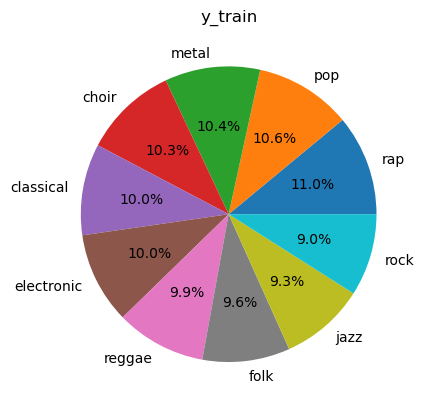

In [8]:
vector = df_div['y_train']
series = pd.Series(vector)
value_counts = series.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(value_counts, labels=series.unique(), autopct='%1.1f%%')
plt.title('y_train')
plt.show()

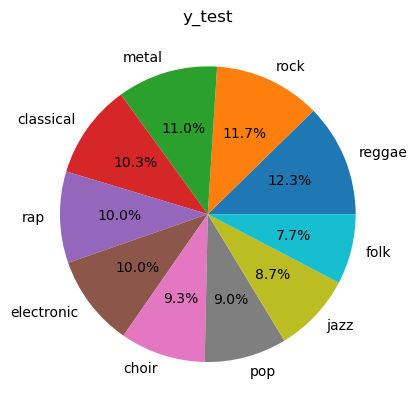

In [9]:
vector = df_div['y_test']
series = pd.Series(vector)
value_counts = series.value_counts()

fig1, ax1 = plt.subplots()
plt.title('y_test')
ax1.pie(value_counts, labels=series.unique(), autopct='%1.1f%%')
plt.show()

## Regresja logistyczna

Macierz pomyłek - zbiór uczący


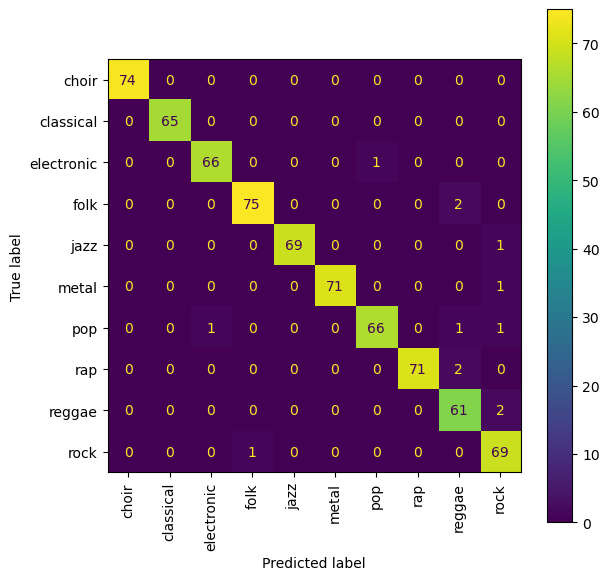

accuracy  =  0.9814285714285714
precision  =  0.9820779062236249
recall  =  0.9814285714285714
f1  =  0.9815779006874407

Macierz pomyłek - zbiór testowy


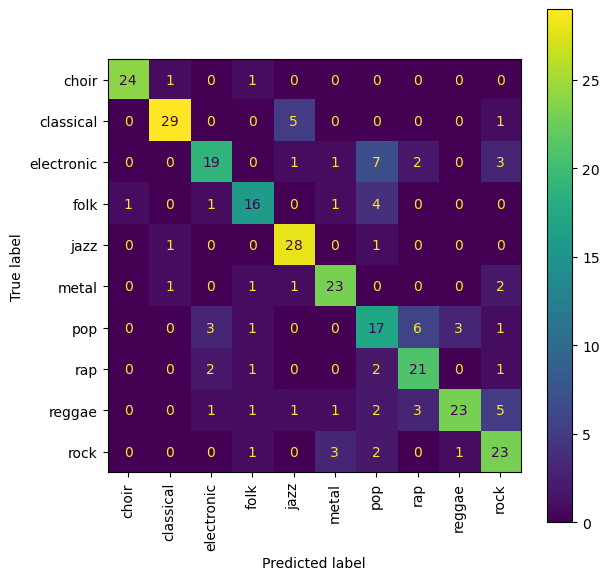

accuracy  =  0.7433333333333333
precision  =  0.7550757175668094
recall  =  0.7433333333333333
f1  =  0.7437426736204207


In [36]:
logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=275)
conf_matrix_train, conf_matrix_test, measures_train, measures_test = train_verify_model(logistic_regression_model, df_div)

measures = ['accuracy', 'precision', 'recall', 'f1']
labels = list(standardised_df.iloc[:, -1].unique())

print("Macierz pomyłek - zbiór uczący")
conf_matrix_heatmap(conf_matrix_train, labels)
for i in range(len(measures_train)):
    print(measures[i], " = ", measures_train[i])

print("\nMacierz pomyłek - zbiór testowy")
conf_matrix_heatmap(conf_matrix_test, labels)
for i in range(len(measures_test)):
    print(measures[i], " = ", measures_test[i])

In [37]:
with open('classification_app/pickles/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(logistic_regression_model, f)

## Drzewo decyzyjne

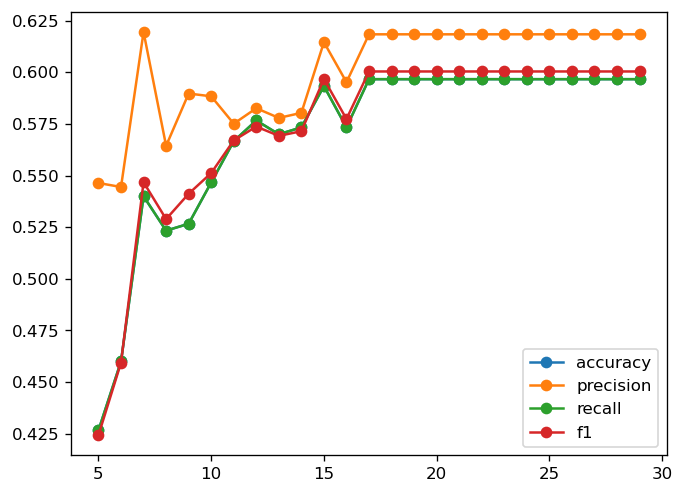

In [13]:
depth_values = range(5, 30)
measures = np.zeros((len(depth_values), 4))
i = 0
for depth in depth_values:
    model = tree.DecisionTreeClassifier(max_depth=depth, random_state=10)
    _, _, _, measures_test = train_verify_model(model, df_div)
    measures[i] = measures_test
    i += 1

plt.figure(dpi=120)
labels = ['accuracy', 'precision', 'recall', 'f1']
for i in range(len(measures_test)):
    plt.plot(depth_values, measures[:, i], 'o-', label=labels[i])
plt.legend()
plt.show()

Przeanalizowawszy wartości **dokładności (accuracy)**, **precyzji (precision)**, **czułości (recall)** i **f1** dla zbioru testowego, wybrałam drzewo decyzyjne o *głębokości = 17*. Dalsze pogłębianie drzewa nie ma wpływu na wartości badanych miar.

Macierz pomyłek - zbiór uczący


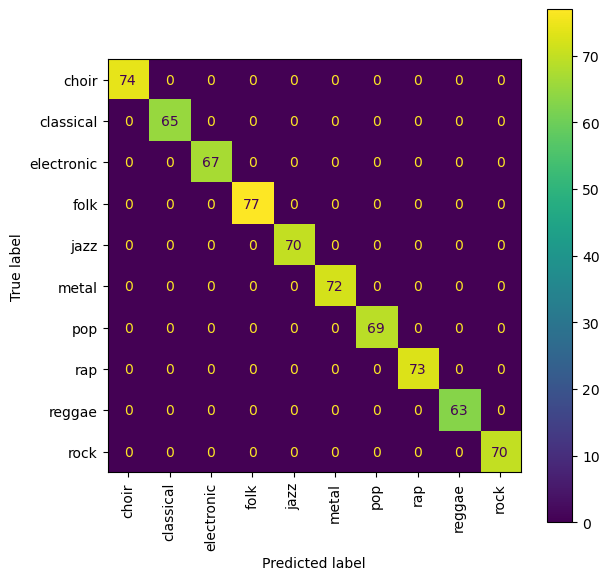

accuracy  =  1.0
precision  =  1.0
recall  =  1.0
f1  =  1.0

Macierz pomyłek - zbiór testowy


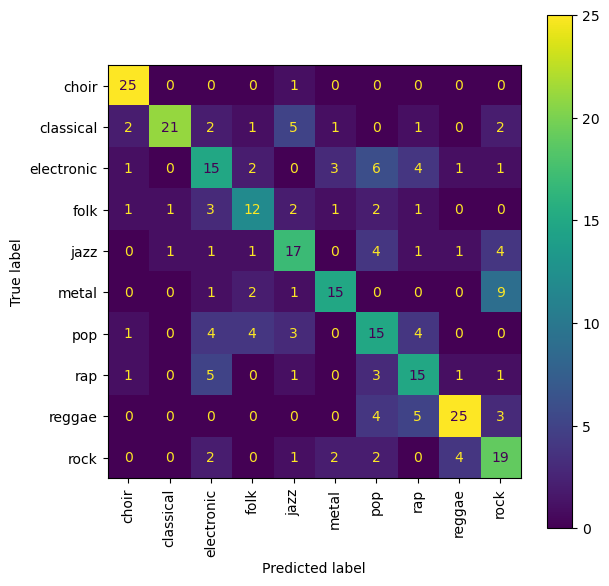

accuracy  =  0.5966666666666667
precision  =  0.6183835254176243
recall  =  0.5966666666666667
f1  =  0.6003975695392703


In [38]:
decision_tree_model = tree.DecisionTreeClassifier(max_depth=17, random_state=10)
conf_matrix_train, conf_matrix_test, measures_train, measures_test = train_verify_model(decision_tree_model, df_div)

measures = ['accuracy', 'precision', 'recall', 'f1']
labels = list(standardised_df.iloc[:, -1].unique())

print("Macierz pomyłek - zbiór uczący")
conf_matrix_heatmap(conf_matrix_train, labels)
for i in range(len(measures_train)):
    print(measures[i], " = ", measures_train[i])

print("\nMacierz pomyłek - zbiór testowy")
conf_matrix_heatmap(conf_matrix_test, labels)
for i in range(len(measures_test)):
    print(measures[i], " = ", measures_test[i])

In [39]:
with open('classification_app/pickles/decision_tree_model.pkl', 'wb') as f:
    pickle.dump(decision_tree_model, f)

## Las losowy

Przeanalizowawszy wartości **dokładności (accuracy)**, **precyzji (precision)**, **czułości (recall)** i **f1** dla zbioru testowego, wybrałam las losowy o *liczbie drzew = 400*. Dalsze zwiększanie liczby drzew pogarsza wartości badanych miar.

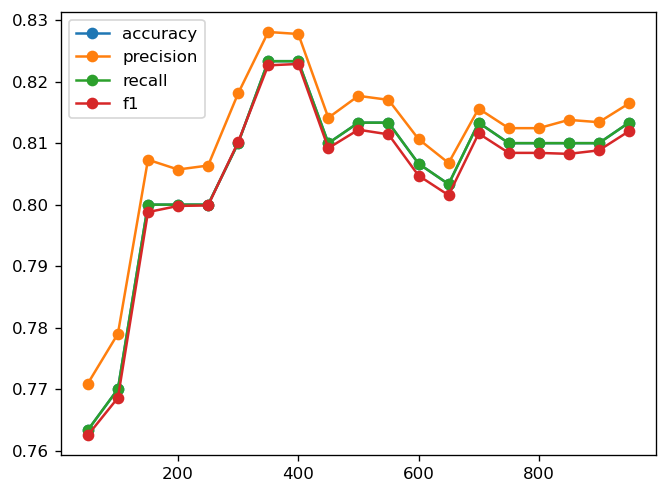

In [49]:
n_estimators_values = range(50, 1000, 50)
measures = np.zeros((len(n_estimators_values), 4))
i = 0
for n_estimators in n_estimators_values:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=10)
    _, _, _, measures_test = train_verify_model(model, df_div)
    measures[i] = measures_test
    i += 1

plt.figure(dpi=120)
labels = ['accuracy', 'precision', 'recall', 'f1']
for i in range(len(measures_test)):
    plt.plot(n_estimators_values, measures[:, i], 'o-', label=labels[i])
plt.legend()
plt.show()

Macierz pomyłek - zbiór uczący


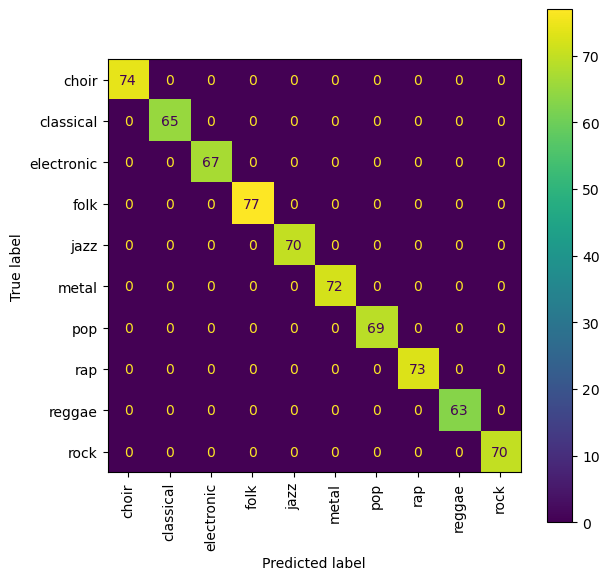

accuracy  =  1.0
precision  =  1.0
recall  =  1.0
f1  =  1.0

Macierz pomyłek - zbiór testowy


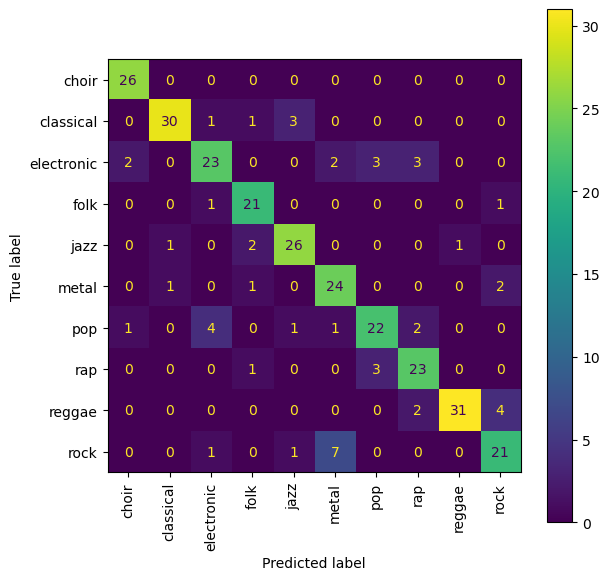

accuracy  =  0.8233333333333334
precision  =  0.8277555232219524
recall  =  0.8233333333333334
f1  =  0.8228814930490311


In [50]:
random_forest_model = RandomForestClassifier(n_estimators=400, random_state=10)
conf_matrix_train, conf_matrix_test, measures_train, measures_test = train_verify_model(random_forest_model, df_div)

measures = ['accuracy', 'precision', 'recall', 'f1']
labels = list(standardised_df.iloc[:, -1].unique())

print("Macierz pomyłek - zbiór uczący")
conf_matrix_heatmap(conf_matrix_train, labels)
for i in range(len(measures_train)):
    print(measures[i], " = ", measures_train[i])

print("\nMacierz pomyłek - zbiór testowy")
conf_matrix_heatmap(conf_matrix_test, labels)
for i in range(len(measures_test)):
    print(measures[i], " = ", measures_test[i])

In [42]:
with open('classification_app/pickles/random_forest_model.pkl', 'wb') as f:
    pickle.dump(random_forest_model, f)

## Porównanie klasyfikatorów

In [17]:
models = [LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=275),
          tree.DecisionTreeClassifier(max_depth=17, random_state=10),
          RandomForestClassifier(n_estimators=400, random_state=10)]
measure_results = np.zeros((len(models), 4))
model_nr = 0
for model in models:
    _, _, _, measures_test = train_verify_model(model, df_div)
    measure_results[model_nr] = measures_test
    model_nr += 1

measures = ['accuracy', 'precision', 'recall', 'f1']
classifiers = ['LogisticRegression', 'DecisionTree', 'RandomForest']
measures_df = pd.DataFrame(measure_results, columns=measures, index=classifiers)
measures_df

,accuracy,precision,recall,f1
LogisticRegression,0.743333,0.755076,0.743333,0.743743
DecisionTree,0.596667,0.618384,0.596667,0.600398
RandomForest,0.823333,0.827756,0.823333,0.822881


<Axes: >

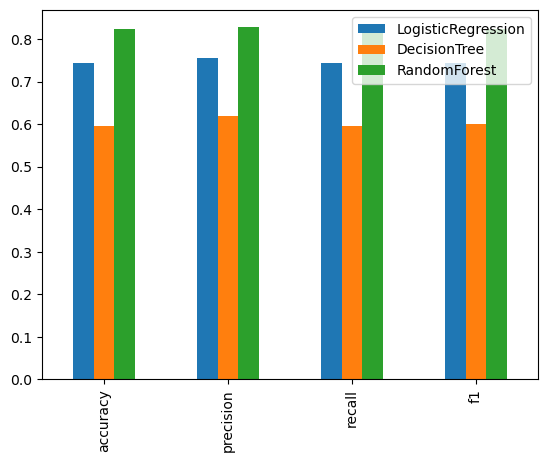

In [18]:
measures_df.T.plot.bar()